In [1]:
files = ["data/breadth.CX113C.txt",
         "data/breadth.CX113E.txt",
         "data/breadth.CX113F.txt",
         "data/breadth.CX113H.txt",
         "data/breadth.CX115H.txt",
         "data/breadth.CX1138.txt",
         "data/breadth.Neige_2_3.txt",
         "data/breadth.Neige_3_2.txt",
         "data/breadth.Neige_4.txt"]

contig_dict = {"JALAAU020000001.1":"Bear",
                "NC_006583.3":"Dog",
                "NC_000001.11":"Human",
                "NC_010443.5":"Pig",
                "NC_037328.1":"Cow",
                "NC_045614.1":"Ermine",
                "NC_091684.1":"Horse",
                "NC_132780.1":"Fox",
                "NC_056054.1":"Sheep",
                "CM081674.1":"Hare",
                "NC_048566.1":"Trout",
                "NC_052532.1":"Chicken",
                "NC_058368.1":"Cat",
                "CATOUS010000006.1":"Deer",
                "NC_060066.1":"Badger",
                "NC_067472.1":"Woodmouse"}

title_dict = {"data/breadth.CX113C.txt":"CX113C - Bear - Autosomal",
            "data/breadth.CX113E.txt":"CX113E - Bear - Autosomal",
            "data/breadth.CX113F.txt":"CX113F - Wolf - Autosomal",
            "data/breadth.CX113H.txt":"CX113H - Wolf - Autosomal",
            "data/breadth.CX115H.txt":"CX115H - Bear - Autosomal",
            "data/breadth.CX1138.txt":"CX1138 - Bear - Autosomal",
            "data/breadth.Neige_2_3.txt":"Neige_2_3 - Wolf - Autosomal",
            "data/breadth.Neige_3_2.txt":"Neige_3_2 - Wolf - Autosomal",
            "data/breadth.Neige_4.txt":"Neige_4 - Wolf - Autosomal"}

In [2]:
import pandas as pd

dfs = []

for f in files:
    df = pd.read_csv(
        f,
        sep=r"\s+",
        names=["contig", "value"]
    )
    df["species"] = df["contig"].map(contig_dict)
    df["file"] = f
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)


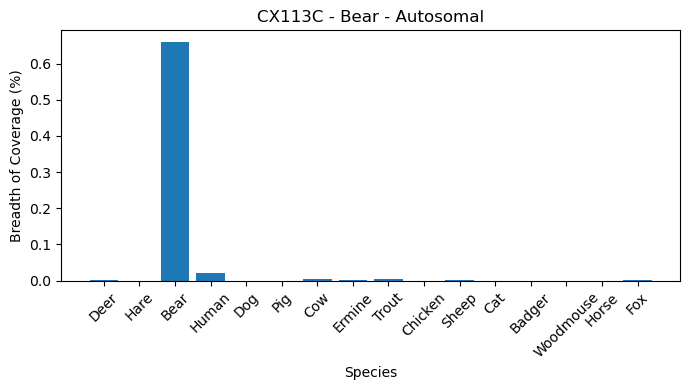

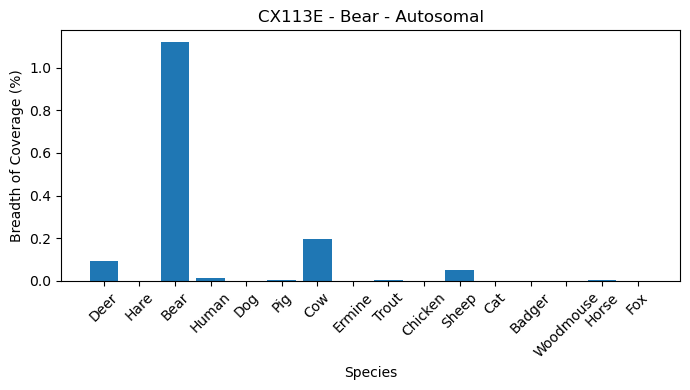

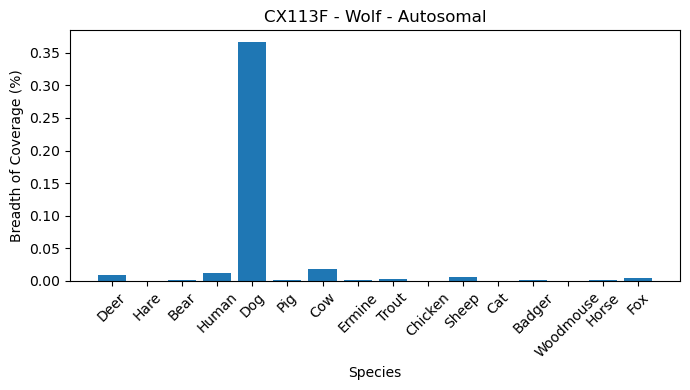

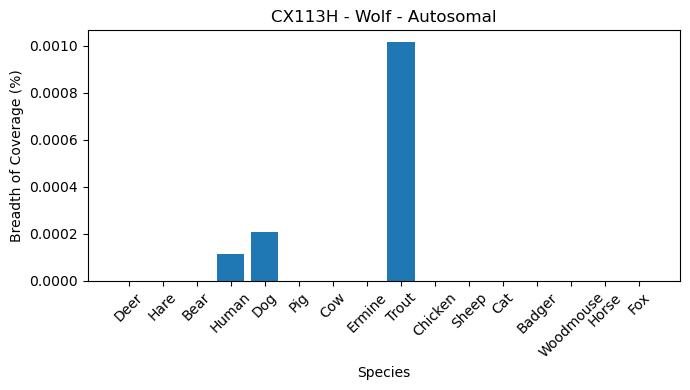

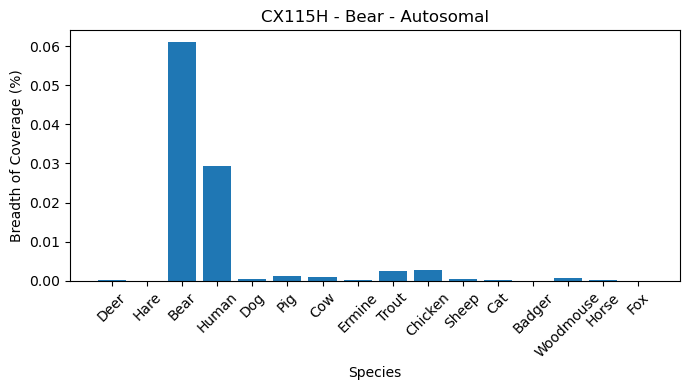

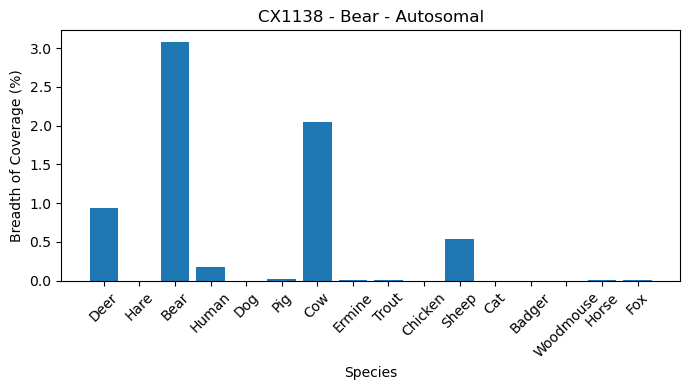

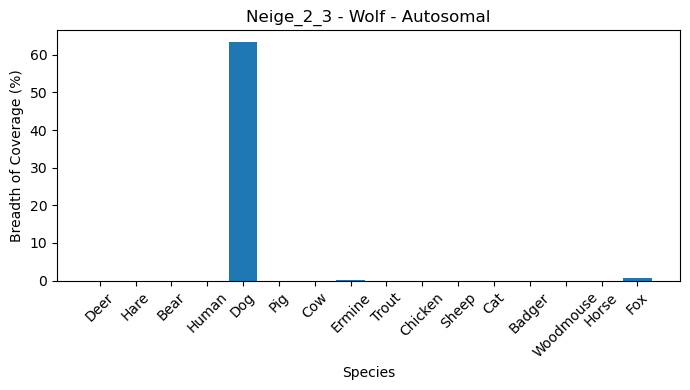

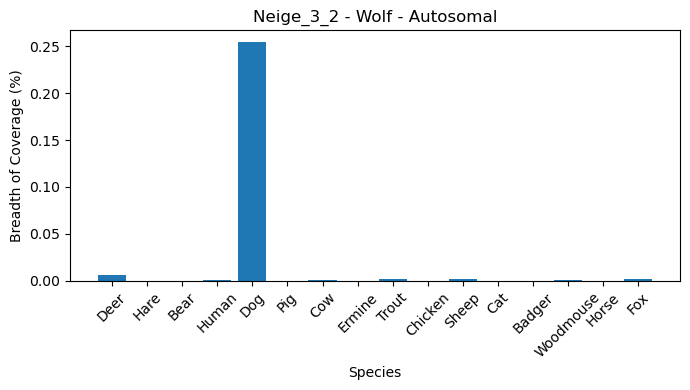

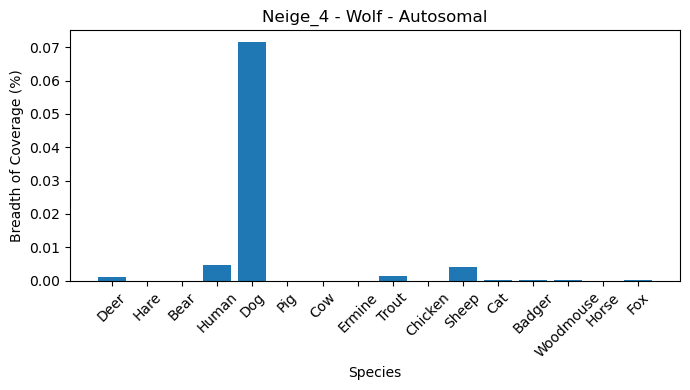

In [3]:
import matplotlib.pyplot as plt
import re
import os

for f in files:
    subset = data[data["file"] == f]

    plt.figure(figsize=(7, 4))
    plt.bar(subset["species"], subset["value"])
    plt.title(title_dict[f])
    plt.xlabel("Species")
    plt.ylabel("Breadth of Coverage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join("plots", re.sub(r'\.txt$', '.png', os.path.basename(f))))
    plt.show()
